In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
file=open("mindbigdata.txt","r")
data=[]

In [3]:
for line in file.readlines():
    data.append(line.replace("\t",",").split(","))

In [4]:
eeg=pd.DataFrame(data)

In [5]:
eeg=eeg.dropna(axis=1)

In [6]:
EEG=eeg.drop(eeg.columns[[0,1,2,5]],axis='columns')

In [7]:
pd.set_option('display.max_colwidth', -1)
EEG.head(15)

C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,3,4,6,7,8,9,10,11,12,13,...,132,133,134,135,136,137,138,139,140,141
0,AF3,6,4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,...,4373.333333,4370.769230,4376.923076,4382.564102,4384.615384,4386.666666,4384.102564,4380.512820,4375.897435,4371.282051
1,F7,6,4489.230769,4475.384615,4474.358974,4486.666666,4498.974358,4496.410256,4486.666666,4489.743589,...,4489.743589,4487.179487,4494.871794,4502.564102,4511.282051,4514.871794,4505.641025,4499.487179,4504.102564,4507.692307
2,F3,6,4538.461538,4528.717948,4524.615384,4526.153846,4532.307692,4538.461538,4535.384615,4528.205128,...,4511.794871,4516.923076,4524.102564,4528.717948,4530.769230,4526.153846,4520.000000,4518.974358,4516.410256,4509.743589
3,FC5,6,4207.692307,4205.641025,4200.512820,4194.358974,4198.461538,4213.846153,4219.487179,4210.769230,...,4210.256410,4207.179487,4210.769230,4214.358974,4215.384615,4216.923076,4216.923076,4213.333333,4204.102564,4199.487179
4,T7,6,4497.948717,4498.461538,4494.871794,4497.948717,4506.153846,4508.205128,4501.538461,4497.435897,...,4507.179487,4508.205128,4507.692307,4506.666666,4511.794871,4514.871794,4512.307692,4509.230769,4503.589743,4499.487179
5,P7,6,4203.076923,4192.820512,4194.871794,4204.615384,4208.205128,4207.692307,4208.205128,4206.153846,...,4196.923076,4193.333333,4194.358974,4198.461538,4200.512820,4198.461538,4194.871794,4190.256410,4186.666666,4184.615384
6,O1,6,4203.076923,4193.333333,4194.871794,4207.179487,4220.512820,4222.564102,4217.435897,4212.307692,...,4326.666666,4328.205128,4333.846153,4337.435897,4335.384615,4330.256410,4326.153846,4327.179487,4326.666666,4322.564102
7,O2,6,4229.743589,4216.923076,4207.179487,4215.384615,4234.871794,4238.974358,4230.769230,4222.564102,...,4212.820512,4207.179487,4209.743589,4217.948717,4218.974358,4214.871794,4211.794871,4210.769230,4205.641025,4200.512820
8,P8,6,4245.641025,4236.410256,4218.461538,4220.000000,4239.487179,4246.153846,4244.102564,4242.564102,...,4226.153846,4222.051282,4225.641025,4238.461538,4240.000000,4230.769230,4230.769230,4237.435897,4230.769230,4224.102564
9,T8,6,4506.666666,4501.025641,4496.923076,4496.923076,4504.102564,4514.358974,4519.487179,4511.794871,...,4491.794871,4491.794871,4510.256410,4520.000000,4513.333333,4513.333333,4514.871794,4505.128205,4502.051282,4508.717948


In [8]:
#번호별로 data 분리
EEG_0=EEG[EEG[4].isin(['0'])]
EEG_1=EEG[EEG[4].isin(['1'])]
EEG_2=EEG[EEG[4].isin(['2'])]
EEG_3=EEG[EEG[4].isin(['3'])]
EEG_4=EEG[EEG[4].isin(['4'])]
EEG_5=EEG[EEG[4].isin(['5'])]
EEG_6=EEG[EEG[4].isin(['6'])]
EEG_7=EEG[EEG[4].isin(['7'])]
EEG_8=EEG[EEG[4].isin(['8'])]
EEG_9=EEG[EEG[4].isin(['9'])]
EEG__1=EEG[EEG[4].isin(['-1'])]

In [9]:
EEG_0=pd.DataFrame(EEG_0.values)
EEG_1=pd.DataFrame(EEG_1.values)
EEG_2=pd.DataFrame(EEG_2.values)
EEG_3=pd.DataFrame(EEG_3.values)
EEG_4=pd.DataFrame(EEG_4.values)
EEG_5=pd.DataFrame(EEG_5.values)
EEG_6=pd.DataFrame(EEG_6.values)
EEG_7=pd.DataFrame(EEG_7.values)
EEG_8=pd.DataFrame(EEG_8.values)
EEG_9=pd.DataFrame(EEG_9.values)
EEG__1=pd.DataFrame(EEG__1.values)

In [10]:
EEG_0=EEG_0.drop(EEG_0.columns[[0,1]],axis='columns')
EEG_1=EEG_1.drop(EEG_1.columns[[0,1]],axis='columns')
EEG_2=EEG_2.drop(EEG_2.columns[[0,1]],axis='columns')
EEG_3=EEG_3.drop(EEG_3.columns[[0,1]],axis='columns')
EEG_4=EEG_4.drop(EEG_4.columns[[0,1]],axis='columns')
EEG_5=EEG_5.drop(EEG_5.columns[[0,1]],axis='columns')
EEG_6=EEG_6.drop(EEG_6.columns[[0,1]],axis='columns')
EEG_7=EEG_7.drop(EEG_7.columns[[0,1]],axis='columns')
EEG_8=EEG_8.drop(EEG_8.columns[[0,1]],axis='columns')
EEG_9=EEG_9.drop(EEG_9.columns[[0,1]],axis='columns')
EEG__1=EEG__1.drop(EEG__1.columns[[0,1]],axis='columns')

In [11]:
eeg_0=EEG_0.values
eeg_1=EEG_1.values
eeg_2=EEG_2.values
eeg_3=EEG_3.values
eeg_4=EEG_4.values
eeg_5=EEG_5.values
eeg_6=EEG_6.values
eeg_7=EEG_7.values
eeg_8=EEG_8.values
eeg_9=EEG_9.values
eeg__1=EEG__1.values

In [12]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
eeg_0[:]=scaler.fit_transform(eeg_0[:])*255
eeg_1[:]=scaler.fit_transform(eeg_1[:])*255
eeg_2[:]=scaler.fit_transform(eeg_2[:])*255
eeg_3[:]=scaler.fit_transform(eeg_3[:])*255
eeg_4[:]=scaler.fit_transform(eeg_4[:])*255
eeg_5[:]=scaler.fit_transform(eeg_5[:])*255
eeg_6[:]=scaler.fit_transform(eeg_6[:])*255
eeg_7[:]=scaler.fit_transform(eeg_7[:])*255
eeg_8[:]=scaler.fit_transform(eeg_8[:])*255
eeg_9[:]=scaler.fit_transform(eeg_9[:])*255
eeg__1[:]=scaler.fit_transform(eeg__1[:])*255

In [31]:
pip install librosa

In [38]:
import librosa
import librosa.display

D=np.abs(librosa.stft(eeg_0))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.show()

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(886176, 14)

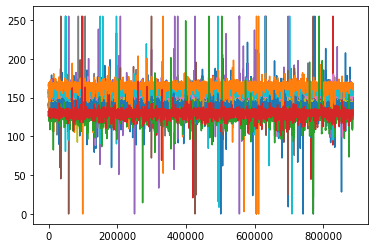

In [35]:
plt.plot(eeg_0)

In [40]:
data_0=eeg_0.reshape(-1,17,14)
data_1=eeg_1.reshape(-1,17,14)
data_2=eeg_2.reshape(-1,17,14)
data_3=eeg_3.reshape(-1,17,14)
data_4=eeg_4.reshape(-1,17,14)
data_5=eeg_5.reshape(-1,17,14)
data_6=eeg_6.reshape(-1,17,14)
data_7=eeg_7.reshape(-1,17,14)
data_8=eeg_8.reshape(-1,17,14)
data_9=eeg_9.reshape(-1,17,14)
data__1=eeg__1.reshape(-1,17,14)

In [28]:
def reshapeLinearData(eeg):
    data=[]
    data=np.r_[eeg[0],eeg[1]]
    for i in range(2,len(eeg)):
        data=np.r_[data,eeg[i]]
    return data

In [15]:
def convertT(eeg) :
    data=[]
    for i in range(len(eeg)) :
        data.append(eeg[i].T)
    data=np.asarray(data)
    return data

In [16]:
eeg_0=convertT(eeg_0)
eeg_1=convertT(eeg_1)
eeg_2=convertT(eeg_2)
eeg_3=convertT(eeg_3)
eeg_4=convertT(eeg_4)
eeg_5=convertT(eeg_5)
eeg_6=convertT(eeg_6)
eeg_7=convertT(eeg_7)
eeg_8=convertT(eeg_8)
eeg_9=convertT(eeg_9)
eeg__1=convertT(eeg__1)

In [30]:
print(eeg_0.shape,eeg_1.shape,eeg_2.shape,eeg_3.shape,eeg_4.shape,eeg_5.shape,eeg_6.shape,eeg_7.shape,eeg_8.shape,eeg_9.shape,eeg__1.shape)

(886176, 14) (863736, 14) (883320, 14) (900048, 14) (863464, 14) (893656, 14) (887128, 14) (861832, 14) (891072, 14) (892568, 14) (21624, 14)


In [41]:
print(data_0.shape,data_1.shape,data_2.shape,data_3.shape,data_4.shape,data_5.shape,data_6.shape,data_7.shape,data_8.shape,data_9.shape,data__1.shape)

(52128, 17, 14) (50808, 17, 14) (51960, 17, 14) (52944, 17, 14) (50792, 17, 14) (52568, 17, 14) (52184, 17, 14) (50696, 17, 14) (52416, 17, 14) (52504, 17, 14) (1272, 17, 14)


In [43]:
from PIL import Image
image = Image.fromarray(data_0[0], 'L') #greyscale image
image.show()

In [29]:
#eeg_0=reshapeLinearData(eeg_0)
eeg_1=reshapeLinearData(eeg_1)
eeg_2=reshapeLinearData(eeg_2)
eeg_3=reshapeLinearData(eeg_3)
eeg_4=reshapeLinearData(eeg_4)
eeg_5=reshapeLinearData(eeg_5)
eeg_6=reshapeLinearData(eeg_6)
eeg_7=reshapeLinearData(eeg_7)
eeg_8=reshapeLinearData(eeg_8)
eeg_9=reshapeLinearData(eeg_9)
eeg__1=reshapeLinearData(eeg__1)

In [44]:
label_0=np.zeros((52128,1))
label_1=np.ones((50808,1))
label_2=np.full((51960,1),2)
label_3=np.full((52944,1),2)
label_4=np.full((50792,1),2)
label_5=np.full((52568,1),2)
label_6=np.full((52184,1),2)
label_7=np.full((50696,1),2)
label_8=np.full((52416,1),2)
label_9=np.full((52504,1),2)
label__1=np.full((1272,1),-1)

In [ ]:
label_0=np.zeros((6516,1))
label_1=np.ones((6351,1))
label_2=np.full((6495,1),2)
label_3=np.full((6618,1),2)
label_4=np.full((6349,1),2)
label_5=np.full((6571,1),2)
label_6=np.full((6523,1),2)
label_7=np.full((6337,1),2)
label_8=np.full((6552,1),2)
label_9=np.full((6563,1),2)
label__1=np.full((159,1),-1)

In [ ]:
data=np.r_[data_0,data_1]
data=np.r_[data,data_2]
data=np.r_[data,data_3]
data=np.r_[data,data_4]
data=np.r_[data,data_5]
data=np.r_[data,data_6]
data=np.r_[data,data_7]
data=np.r_[data,data_8]
data=np.r_[data,data_9]
data=np.r_[data,data__1]
print(data.shape)

In [142]:
from PIL import Image
img = Image.fromarray(data[0], 'RGB')
img.save('my.png')
img.show()

In [ ]:
label=np.r_[label_0,label_1]
label=np.r_[label,label_2]
label=np.r_[label,label_3]
label=np.r_[label,label_4]
label=np.r_[label,label_5]
label=np.r_[label,label_6]
label=np.r_[label,label_7]
label=np.r_[label,label_8]
label=np.r_[label,label_9]
label=np.r_[label,label__1]
print(label.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=None, shuffle=True, stratify=label)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras import optimizers

from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from keras import backend as K

In [ ]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
from tensorflow.keras import utils as np_utils
y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test, 11)
print(y_train.shape, y_test.shape)
pd.DataFrame(y_train).head

In [ ]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(150, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    
    model.add(Dense(11, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy', precision, recall, f1score])

    return model

model = basic_cnn()
model.summary()

In [ ]:
hist=model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test,y_test))

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results)

_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

In [ ]:
fig, rec_ax = plt.subplots()

pre_ax = rec_ax.twinx()

rec_ax.plot(hist.history['recall'], 'y', label='train recall')
rec_ax.plot(hist.history['val_recall'], 'r', label='val recall')

pre_ax.plot(hist.history['precision'], 'b', label='train precision')
pre_ax.plot(hist.history['val_precision'], 'g', label='val precision')

rec_ax.set_xlabel('epoch')
rec_ax.set_ylabel('recall')
pre_ax.set_ylabel('precision')

rec_ax.legend(loc='upper left')
pre_ax.legend(loc='lower left')

plt.show()